To view: 👉👉👉 [![Launch Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gist/posita/fd78353595e61e5ba888ed77fad225a5/HEAD?labpath=_sum_of_highest.ipynb) 👈👈👈

## [``dyce``](https://posita.github.io/dyce/) solution to [“Is this doing what I think it's doing? Anydice - sum of highest rolled dice normalized for dice count”](https://rpg.stackexchange.com/q/195988)

Once viewing this notebook in Jupyter Lab, select ``Run All Cells`` from the ``Run`` menu above.

In [1]:
# Install additional requirements if necessary
try:
    import dyce
except ImportError:
    import pip
    pip.main(["install", "--requirement", "requirements.txt"])

In [ ]:
from dyce import H, P

d10 = H(10)

def mechanic(nd10_roll):
    outcome_max = max(nd10_roll)
    # We are faithfully reproducing the approach here of (max * count). As alluded to
    # in the original question, we could have just as easily written something like:
    #   max_sum = sum(outcome for outcome in nd10_roll if outcome == outcome_max)
    count_max = sum(1 for outcome in nd10_roll if outcome == outcome_max)
    max_sum = outcome_max * count_max
    return max_sum

results = {
  n: P.foreach(mechanic, nd10_roll=n@P(d10))
  for n in range(2, 7)
}

from anydyce import BreakoutType, jupyter_visualize

jupyter_visualize(
    [(f"{n}d10\nmean: {h.mean():.3}", h) for n, h in results.items()],
    default_breakout_type=BreakoutType.BURST,
)

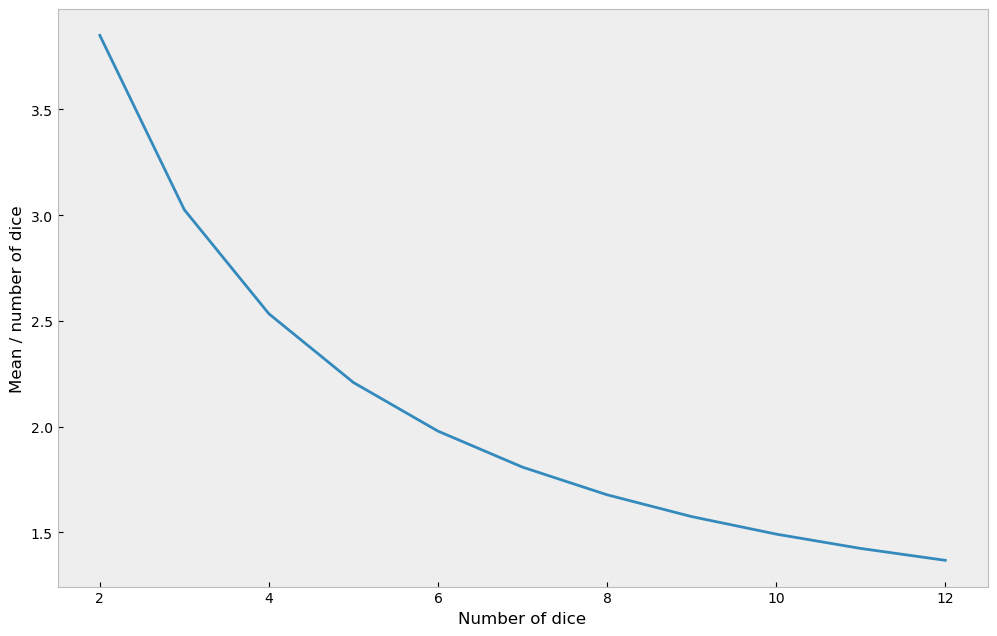

In [3]:
import matplotlib.pyplot

extended_results = {
  n: P.foreach(mechanic, nd10_roll=n@P(d10))
  for n in range(2, 13)
}

x, y = zip(*((n, h.mean() / n) for n, h in extended_results.items()))

_, ax = matplotlib.pyplot.subplots()
ax.plot(x, y)
ax.set_xlabel('Number of dice')
ax.set_ylabel('Mean / number of dice')
ax.grid()
matplotlib.pyplot.show()